<a href="https://colab.research.google.com/github/ganuwoahh/tdlta/blob/main/Week1_Optimizers_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import time

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
def create_cnn_model():
    return Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

In [4]:
optimizers = {
    "Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "RMSprop": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001),
}


In [5]:
history_results = {}
training_times = {}
test_accuracies = {}

#train with each optimizer
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name}...")
    model = create_cnn_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()

    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=10,
        batch_size=64,
        verbose=1
    )

    end_time = time.time()
    training_time = end_time - start_time
    training_times[name] = training_time
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies[name] = test_accuracy
    history_results[name] = history.history


Training with Momentum...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 109ms/step - accuracy: 0.2404 - loss: 2.0488 - val_accuracy: 0.4661 - val_loss: 1.4501
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 81ms/step - accuracy: 0.4584 - loss: 1.4964 - val_accuracy: 0.5559 - val_loss: 1.2575
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5307 - loss: 1.3174 - val_accuracy: 0.6026 - val_loss: 1.1225
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.5806 - loss: 1.1925 - val_accuracy: 0.6335 - val_loss: 1.0527
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.6134 - loss: 1.1002 - val_accuracy: 0.6527 - val_loss: 0.9898
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.6391 - loss: 1.0329 - val_accuracy: 0.6631 - val_loss: 0.9645
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.6547 - loss: 0.9848 - val_accuracy: 0.6680 - val_loss: 0.9553
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6670 - loss: 0.9412 

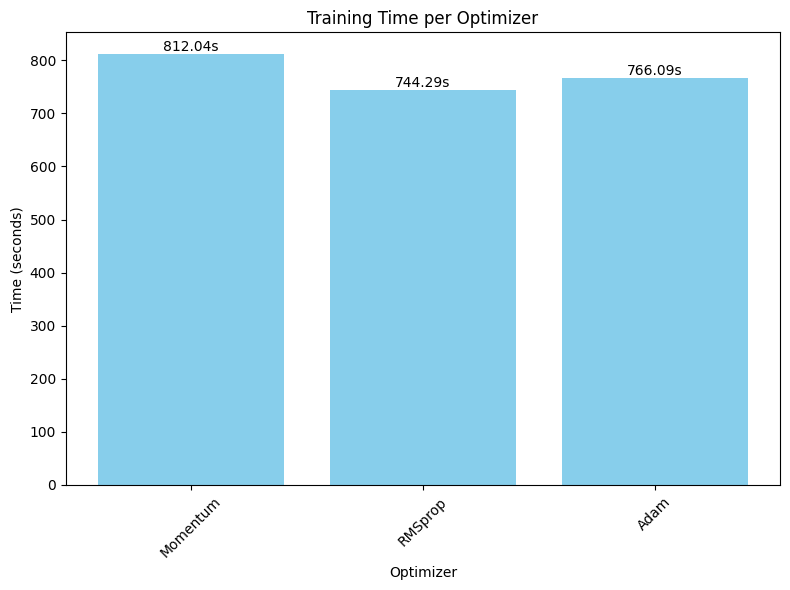

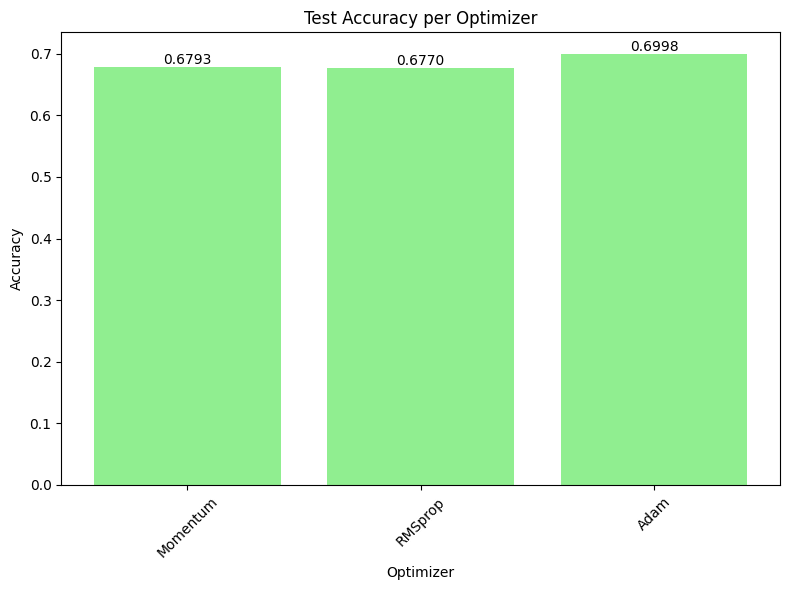

In [12]:
plt.figure(figsize=(8, 6))
bars = plt.bar(training_times.keys(), training_times.values(), color='skyblue')
plt.title('Training Time per Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}s',
        ha='center', va='bottom', fontsize=10
    )

plt.show()

plt.figure(figsize=(8, 6))
bars = plt.bar(test_accuracies.keys(), test_accuracies.values(), color='lightgreen')
plt.title('Test Accuracy per Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
        ha='center', va='bottom', fontsize=10
    )

plt.show()

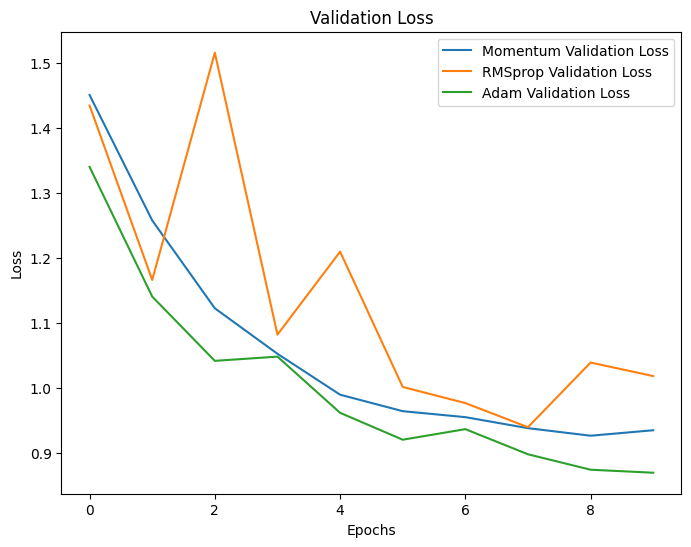

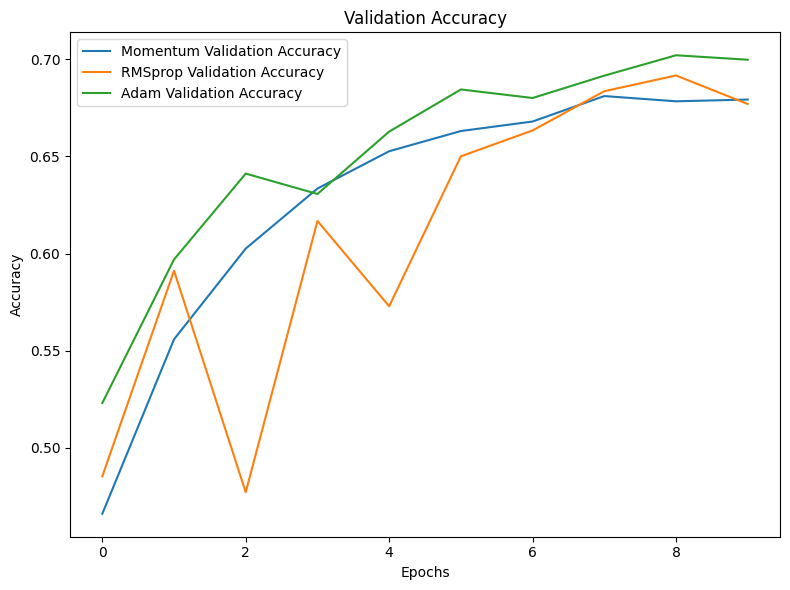

In [14]:
#loss
plt.figure(figsize=(8, 6))
for name, history in history_results.items():
    plt.plot(history['val_loss'], label=f'{name} Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#accuracy
plt.figure(figsize=(8, 6))
for name, history in history_results.items():
    plt.plot(history['val_accuracy'], label=f'{name} Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()